In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

df_2020_2021 = pd.read_csv('combined_2020_2021.csv')
df_2021_2022 = pd.read_csv('combined_2021_2022.csv')

In [2]:
# List of all-star players for the 2020-2021 NBA season
allstar_players_2020_2021 = [
    "Kevin Durant", "Giannis Antetokounmpo", "Bradley Beal", "Kyrie Irving",
    "Joel Embiid", "James Harden", "Jayson Tatum", "Jaylen Brown",
    "Zach LaVine", "Julius Randle", "Ben Simmons", "Nikola Vučević",
    "LeBron James", "Stephen Curry", "Luka Dončić", "Kawhi Leonard",
    "Nikola Jokić", "Damian Lillard", "Chris Paul", "Paul George",
    "Donovan Mitchell", "Rudy Gobert", "Anthony Davis", "Zion Williamson"
]

# Adding an "allstar" column to the dataframe
df_2020_2021['allstar'] = df_2020_2021['Player'].apply(lambda x: x in allstar_players_2020_2021)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Selecting features and target variable
features = df_2020_2021.drop(columns=['Player', 'allstar'])
target = df_2020_2021['allstar']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluating the model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Extracting feature importances from the model
feature_importances = model.feature_importances_

# Creating a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Displaying the most and least important features
most_important_features = feature_importance_df.head()
least_important_features = feature_importance_df.tail()

print(f"Most important features: {most_important_features}")
print(f"Least important features: {least_important_features}")
      

print(accuracy)


Most important features:    Feature  Importance
19    VORP    0.138497
41     PTS    0.125946
18     BPM    0.109324
20      FG    0.072393
16    OBPM    0.069532
Least important features:    Feature  Importance
2     3PAr    0.002892
25     3P%    0.002530
28     2P%    0.002435
33     ORB    0.002119
10    TOV%    0.001514
0.9918256130790191


In [4]:
# Preparing the 2021-2022 data for prediction
# Ensure the data has the same columns as the training data
df_2021_2022_features = df_2021_2022[features.columns]

# Standardizing the 2021-2022 data using the same scaler as the training data
df_2021_2022_scaled = scaler.transform(df_2021_2022_features)

# Predicting all-star players for the 2021-2022 season
predicted_allstars = model.predict(df_2021_2022_scaled)

# Adding the prediction to the 2021-2022 dataframe
df_2021_2022['predicted_allstar'] = predicted_allstars

# Displaying the players predicted as all-stars
predicted_allstars_df = df_2021_2022[df_2021_2022['predicted_allstar'] == True]
predicted_allstars_df[['Player', 'predicted_allstar']]


,Player,predicted_allstar
27,Giannis Antetokounmpo,True
106,Devin Booker,True
166,Jimmy Butler,True
261,Stephen Curry,True
262,Anthony Davis,True
269,DeMar DeRozan,True
292,Luka Dončić,True
336,Kevin Durant,True
344,Joel Embiid,True
455,Rudy Gobert,True


In [5]:
# Actual all-star players for the 2021-2022 NBA season
actual_allstars_2021_2022 = [
    "Trae Young", "DeMar DeRozan", "Joel Embiid", "Kevin Durant", "Giannis Antetokounmpo",
    "LaMelo Ball", "Darius Garland", "James Harden", "Zach LaVine", "Fred VanVleet",
    "Jimmy Butler", "Khris Middleton", "Jayson Tatum", "Jarrett Allen",
    "Stephen Curry", "Ja Morant", "Nikola Jokić", "LeBron James", "Andrew Wiggins",
    "Devin Booker", "Luka Dončić", "Donovan Mitchell", "Dejounte Murray", "Chris Paul",
    "Draymond Green", "Rudy Gobert", "Karl-Anthony Towns"
]

# Predicted all-stars from the model
predicted_allstars_list = predicted_allstars_df['Player'].tolist()

# Comparing the predicted all-stars with the actual all-stars
correct_predictions = set(predicted_allstars_list).intersection(set(actual_allstars_2021_2022))
missed_predictions = set(actual_allstars_2021_2022) - set(predicted_allstars_list)
incorrect_predictions = set(predicted_allstars_list) - set(actual_allstars_2021_2022)

print(f"Correct Predictions: {correct_predictions}")
print(f"Actual All-Stars not predicted by the Model: {missed_predictions}")
print(f"Predicted by the Model but not Actual All-Stars: {incorrect_predictions}")

# Calculating accuracy
total_actual_allstars = len(actual_allstars_2021_2022)
total_correct_predictions = len(correct_predictions)
total_incorrect_predictions = len(incorrect_predictions)

# Accuracy is the number of correct predictions divided by the total number of actual all-stars
accuracy = total_correct_predictions / total_actual_allstars
accuracy_percentage = accuracy * 100
accuracy_percentage

print(f"Percentage of correctly predicted All-Stars {accuracy_percentage}")


Correct Predictions: {'Jayson Tatum', 'Rudy Gobert', 'Devin Booker', 'Kevin Durant', 'Jimmy Butler', 'Joel Embiid', 'Ja Morant', 'Stephen Curry', 'LeBron James', 'Luka Dončić', 'James Harden', 'Karl-Anthony Towns', 'Giannis Antetokounmpo', 'DeMar DeRozan', 'Nikola Jokić', 'Donovan Mitchell', 'Chris Paul', 'Dejounte Murray', 'Trae Young'}
Actual All-Stars not predicted by the Model: {'Darius Garland', 'Khris Middleton', 'Jarrett Allen', 'Zach LaVine', 'Draymond Green', 'Fred VanVleet', 'Andrew Wiggins', 'LaMelo Ball'}
Predicted by the Model but not Actual All-Stars: {'Pascal Siakam', 'CJ McCollum', 'Anthony Davis', 'Kyrie Irving'}
Percentage of correctly predicted All-Stars 70.37037037037037


C:\Users\coope\AppData\Local\Temp\ipykernel_24868\3353455505.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="cubehelix")


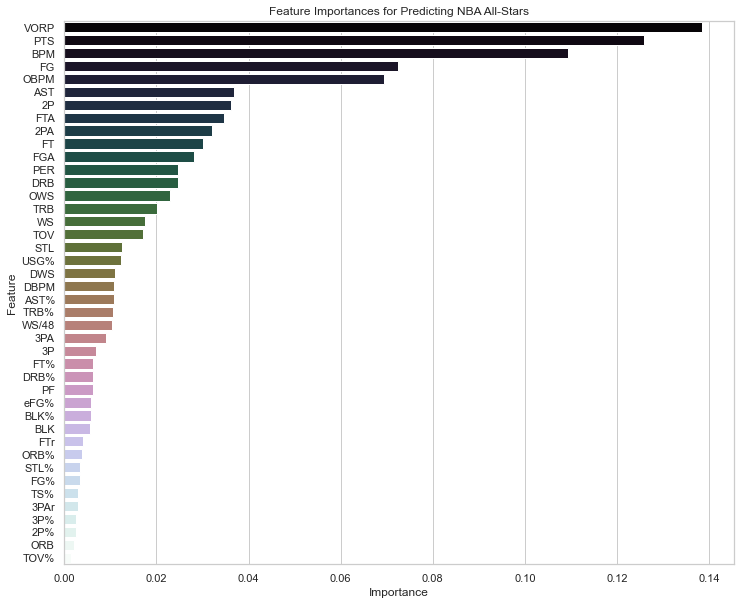

In [11]:
# Extracting feature importances from the model
feature_importances = model.feature_importances_

# Creating a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")
# Plotting all feature importances with a gradient color palette
plt.figure(figsize=(12, 10))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="cubehelix")
plt.title("Feature Importances for Predicting NBA All-Stars")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

